In [1]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse, progressbar
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

sns.set()

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60_000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [4]:
len(train_images)

60000

In [5]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

In [6]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model, Sequential

In [9]:
def get_model():
    model = Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy")
    return model

In [10]:
model = get_model()
H_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 46s 949us/sample - loss: 0.6193 - val_loss: 0.3305
Epoch 2/10
48000/48000 [==============================] - 13s 262us/sample - loss: 0.2506 - val_loss: 0.2142
Epoch 3/10
48000/48000 [==============================] - 13s 268us/sample - loss: 0.1613 - val_loss: 0.1472
Epoch 4/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.1135 - val_loss: 0.1301
Epoch 5/10
48000/48000 [==============================] - 14s 285us/sample - loss: 0.0815 - val_loss: 0.1625
Epoch 6/10
48000/48000 [==============================] - 13s 270us/sample - loss: 0.0595 - val_loss: 0.1711
Epoch 7/10
48000/48000 [==============================] - 13s 276us/sample - loss: 0.0454 - val_loss: 0.2004
Epoch 8/10
48000/48000 [==============================] - 15s 316us/sample - loss: 0.0325 - val_loss: 0.1523
Epoch 9/10
48000/48000 [==============================] - 15s 314us/sample - l

In [11]:
model = get_model()
H_zeroes = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 377us/sample - loss: 0.2869 - val_loss: 0.1481
Epoch 2/10
48000/48000 [==============================] - 16s 328us/sample - loss: 0.1191 - val_loss: 0.1035
Epoch 3/10
48000/48000 [==============================] - 16s 336us/sample - loss: 0.0785 - val_loss: 0.1072
Epoch 4/10
48000/48000 [==============================] - 18s 366us/sample - loss: 0.0575 - val_loss: 0.0808
Epoch 5/10
48000/48000 [==============================] - 15s 320us/sample - loss: 0.0427 - val_loss: 0.0740
Epoch 6/10
48000/48000 [==============================] - 15s 308us/sample - loss: 0.0315 - val_loss: 0.0804
Epoch 7/10
48000/48000 [==============================] - 15s 308us/sample - loss: 0.0243 - val_loss: 0.0848
Epoch 8/10
48000/48000 [==============================] - 15s 317us/sample - loss: 0.0191 - val_loss: 0.0817
Epoch 9/10
48000/48000 [==============================] - 15s 317us/sample - l

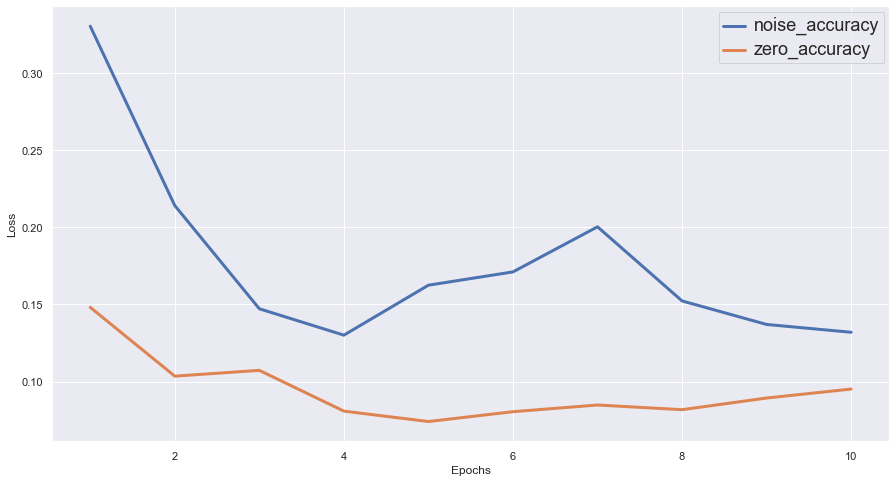

In [17]:
# plot the performance
epochs = range(1, 11)
noise_accuracy = H_noise.history['val_loss']
zero_accuracy = H_zeroes.history['val_loss']
plot_df = pd.DataFrame(data=np.c_[epochs, noise_accuracy, zero_accuracy],
                       columns=['epochs', 'noise_accuracy', 'zero_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=plot_df, x='epochs', y='noise_accuracy', ax=ax, label='noise_accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='zero_accuracy', ax=ax, label='zero_accuracy', linewidth=3)
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18');  # for legend textCNN

In [16]:
H_noise.history.keys()

dict_keys(['loss', 'val_loss'])